# <div align="center"><b> ПРОЕКТ: Банки — Анализ оттока клиентов</b></div>

## Материалы:
[Презентация](https://disk.yandex.ru/i/7FXnb7Lqne9IYQ)

**Заказчик** - отдел маркетинга “Метанпромбанка”.  

**Цель работы** - в банке повысился отток, и с этим нужно что-то делать.  

**Ретроспектива** - ранее было проведено исследование оттока, составлены
дэшборды и выделены сегменты, но клиентская база поменялась, и текущие
решения не работают.  

**Конечный результат** - выделены отточные сегменты, даны рекомендации по его
снижению.

**Выполнение проекта планирую в несколько этапов:**
- Загрузка данных и изучение информации
- Предобработка данных
- Исследовательский анализ  данных
- Формирование и проверка гипотез
- Подведение промежуточных итогов
- Сегментация
- Приоритезация сегментов
- Формирование рекомендаций
- Вывод 

## ПЛАН ПРОЕКТА:

**1.Загрузка данных и изучение информации**

1.1 Откроем таблицу с данными и изучим общую информацию

**2.Предобработка данных**

2.1 Приведем названия столбцов к нижнему регистру.

2.2 Проверим выбросы и удалим, если потребуется

2.4 Проверим наличие дубликатов в данных. Поработаем над ними, если потребуется.

2.3 Проверим пропуски и типы данных. Откорректируем, если потребуется.

2.5 Применим кодирование (для использования в анализе корреляции).

**3.Исследовательский анализ данных**

3.1 Анализ распределения признаков в разрезе оттока.

3.1.1 Посмотрим распределение клиентов по возрасту в разрезе оттока

3.1.2 Посмотрим распределение клиентов по полу в разрезе оттока

3.1.3 Посмотрим распределение клиентов по скоринговому рейтингу в разрезе оттока

3.1.4 Посмотрим распределение клиентов по количеству продуктов в разрезе оттока.

3.1.5 Посмотрим распределение клиентов по количеству баллов собственности в разрезе оттока.

3.1.6 Посмотрим распределение клиентов по наличию кредитной карты в разрезе оттока.

3.1.7 Посмотрим распределение клиентов по доходу в разрезе оттока.

3.1.8 Посмотрим распределение клиентов по балансу в разрезе оттока.

3.1.9 Посмотрим распределение клиентов по активности в разрезе оттока.

3.1.10 Посмотрим распределение клиентов по городам в разрезе оттока.

3.2 Корреляционный анализ признака оттока клиентов с другими признаками.

3.2.1 Посмотрим корреляцию оттока клиентов с другими признаками по шкале Чеддока.

3.3 Анализ портретов клиентов в разрезе оттока

**4.Формирование и проверка гипотез**

4.1 Проверим гипотезу: Различия дохода между теми клиентами, которые ушли и теми, которые остались.

4.2 Проверим гипотезу: Различия среднего скорингового балла между теми клиентами, которые ушли и теми, которые остались.

**5.Подведение промежуточных итогов**

**6.Сегментация**

**7.Приоритезация сегментов**

**8.Формирование рекомендаций**

**9.Вывод**

### Загрузка данных и изучение информации

#### Откроем таблицу с данными и изучим общую информацию

In [1]:
# Установим  библиотеку phik
!pip install phik

In [2]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mth
import phik

In [3]:
# зададим размеры графиков seaborn и цвет фона

sns.set(rc={'figure.figsize':(12, 8)})
sns.set_style("white")

In [4]:
#загружаем данные
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

data.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


In [5]:
# посмотрим общую информацию о данных, пропусках, дубликатах
def tab_inf (data):
    print('\033[1m' + '===Общая информация о данных===' + '\033[0m')
    display(data.info())
    print('\033[1m' + '===Статистические данные===' + '\033[0m')
    display(data.describe())
    print('\033[1m' + '===Количество пропусков===' + '\033[0m')
    display(data.isna().sum())
    print('\033[1m' + '===Количество дубликатов===' + '\033[0m')
    if data.duplicated().sum() > 0:
        print('\033[1m' + 'Дубликаты: ' + '\033[0m', data.duplicated().sum())
    else:
        print('\033[1m' + '===Дубликатов НЕТ===' + '\033[0m')

In [6]:
tab_inf(data)

===Общая информация о данных===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

===Статистические данные===


,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


===Количество пропусков===


USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

===Количество дубликатов===
===Дубликатов НЕТ===


Переименуем названия столбцов 'USERID' и 'EST_SALARY' для удобства.  
В столбцах 'score' и 'age' заменим тип данных на целочисленный.  
Присутствуют аномальные значения, например в столбце 'age' максимальный возраст в 86 лет, и также стоит посмотреть аномалии по столбцам 'balance' и 'est_salary'.   
Посмотрим в столбце 'product' значение 0.  
Имеются пропуски в столбцах 'age' и 'balance' дальше посмотрим как их обработать.  
Явные дубликаты отсутствуют, еще посмотрим по неявным.

### Предобработка данных

#### Приведем названия столбцов к нужному виду.

In [7]:
# переименуем названия столбцов для удобства
data.rename(columns={'USERID':'user_id', 'EST_SALARY':'est_salary'}, inplace=True)
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


#### Проверим выбросы и удалим, если потребуется

In [8]:
# посмотрим значение 0 в столбце с продуктами банка
data[data['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


Нашлась одна строка с таким клиентом, это уже не активный клиент, который закрыл все продукты банка и ушел из него.  
Так что просто удалим эту строку, чтоб в дальнейшем не искажала анализ.

In [9]:
# удалим строку
data = data[data['products']!=0]
data['products'].describe()

count    9999.000000
mean        1.870287
std         0.792466
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: products, dtype: float64

Посмотрим аномальные данные по возрасту в столбце 'age', я считаю, что возраст в 86 лет, слишком уже большой для клиента банка.

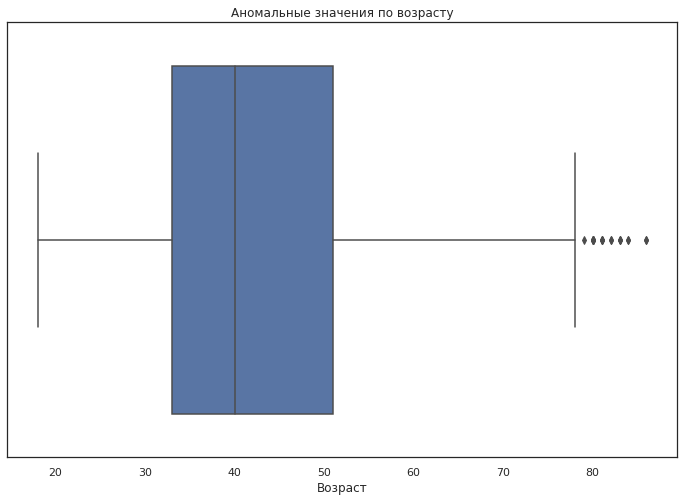

In [10]:
sns.boxplot(x=data['age'])
plt.title('Аномальные значения по возрасту')
plt.xlabel('Возраст');

Здесь видим, что возраст больше 80 относится к аномальным значениям, посмотрим количество таких данных и если получится, то удалим.

In [11]:
print('Количество клиентов с возрастом равным либо больше 80: ', len(data.query('age  >= 80')))
print('Доля от всего датасета: ',"{:.1%}".format(len(data.query('age >= 80'))/len(data)))

Количество клиентов с возрастом равным либо больше 80:  20
Доля от всего датасета:  0.2%


Небольшое количество таких данных, меньше 1%, можем спокойно удалить их.

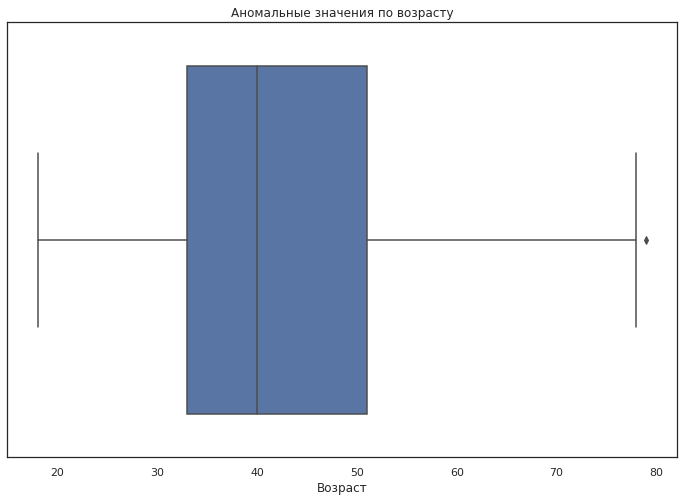

In [12]:
# удалим аномальные значения
age_1 = data.query('age >= 80')
data.drop(age_1.index, axis=0, inplace=True)
sns.boxplot(x=data['age'])
plt.title('Аномальные значения по возрасту')
plt.xlabel('Возраст');

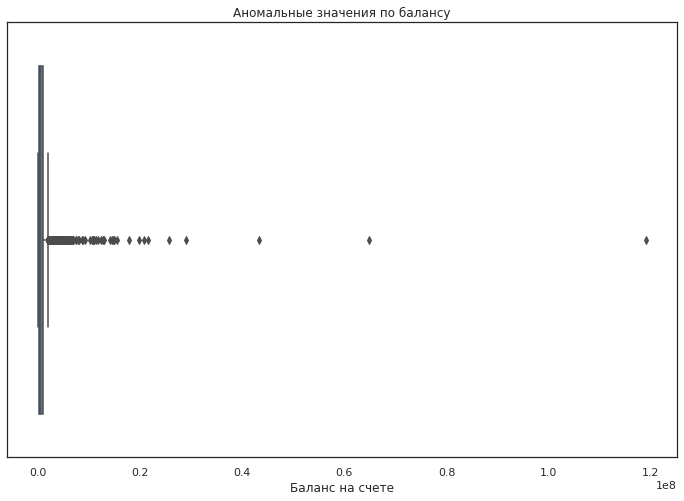

In [13]:
sns.boxplot(x=data['balance'])
plt.title('Аномальные значения по балансу')
plt.xlabel('Баланс на счете');

In [14]:
print('Количество клиентов с балансом равным 0 и выше 2500000:', len(data.query('balance == 0 or balance > 2500000')))
print('Доля от всего датасета: ',"{:.1%}".format(len(data.query('balance == 0 or balance > 2500000'))/len(data)))

Количество клиентов с балансом равным 0 и выше 2500000: 290
Доля от всего датасета:  2.9%


В столбце 'balance' было 2 нулевых значения и некоторые выбросы более 2500000, такие значения имеют меньше 3% их также удалим, так как сильно влияю на дальнейшее исследование.

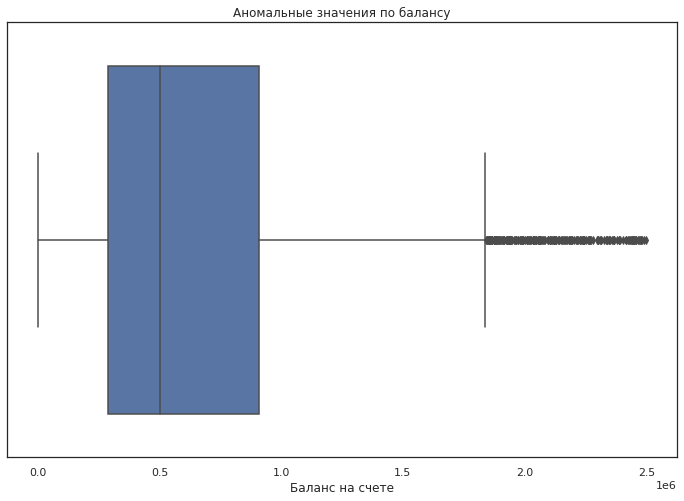

In [15]:
# удалим выбросы
balance_1 = data.query('balance == 0 or balance > 2500000')
data.drop(balance_1.index, axis=0, inplace=True)
sns.boxplot(x=data['balance'])
plt.title('Аномальные значения по балансу')
plt.xlabel('Баланс на счете');

Некоторые аномальные значение еще остались, но думаю они уже не так сильно будут влият на дальнейший анализ.  
Еще посмотрим выбросы по столбцу 'est_salary'

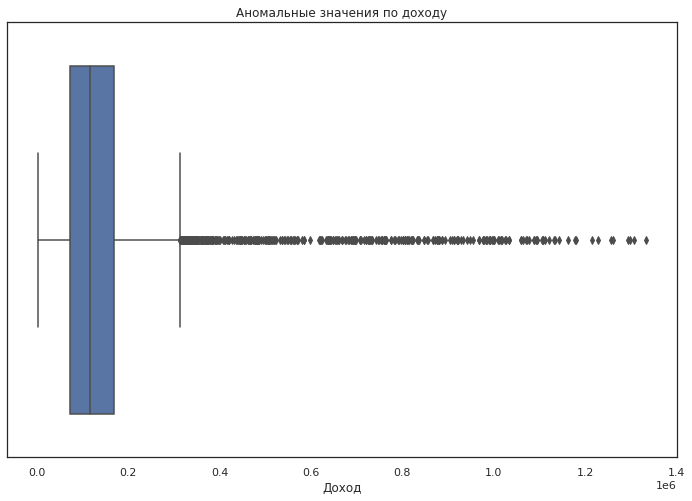

In [16]:
sns.boxplot(x=data['est_salary'])
plt.title('Аномальные значения по доходу')
plt.xlabel('Доход');

In [17]:
print('Количество клиентов с доходом равным либо выше 800000:', len(data.query('est_salary >= 800000')))
print('Доля от всего датасета: ',"{:.1%}".format(len(data.query('est_salary >= 800000'))/len(data)))

Количество клиентов с доходом равным либо выше 800000: 101
Доля от всего датасета:  1.0%


Здесь аномальные доходы начинаются от 400т.р., но мы уже не можем так много удалить, сильно будут искажаться данные.  
Взяли значение в 800т.р. таких значий всего 1%, так что можем их также удалить.


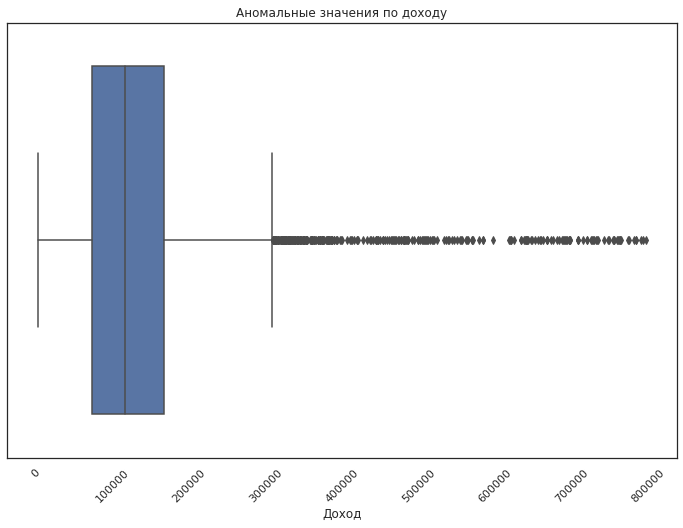

In [18]:
# удалим выбросы
est_1 = data.query('est_salary >= 800000')
data.drop(est_1.index, axis=0, inplace=True)
plt.figure(figsize=(12, 8))
sns.boxplot(x=data['est_salary'])
plt.xticks(rotation=45)
plt.title('Аномальные значения по доходу')
plt.xlabel('Доход');

#### Проверим наличие дубликатов в данных. Поработаем над ними, если потребуется.

Явные дубликаты отстутствуют, посмотрим по неявным.

In [19]:
# найдем дубликаты в столбце user_id:

print ('Количество дубликатов :', data['user_id'].duplicated().sum())

Количество дубликатов : 64


In [20]:
data[data.duplicated(subset=['user_id'],keep=False)].sort_values('user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6446,222480,776.0,Ярославль,Ж,38.0,5,823145.83,2,1,1,55777.44,0
6412,226550,939.0,Ярославль,М,34.0,0,NaN,1,1,1,145913.73,0
8070,226550,940.0,Рыбинск,М,NaN,0,NaN,1,0,1,147696.95,0
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1


Как мы видим, идентификатор пересекается с филиалами из других городов, поэтому считать их дубликатами мы не можем, оставляем как есть.

In [21]:
# проверим уникальные значения по некоторым столбцам

for column in ['city',
               'gender',
               'credit_card',
               'last_activity', 
               'churn']:
    print(column)
    print(data[column].unique())
    print()   

city
['Рыбинск' 'Ярославль' 'Ростов']

gender
['Ж' 'М']

credit_card
[0 1]

last_activity
[1 0]

churn
[1 0]



Во всех остальных столбцах также все в порядке, можем двигаться дальше. Для дальнейшего анализа столбец user_id нам больше не понадобится и можем его удалить.

In [22]:
# удаляем столбец user_id

data.drop('user_id', axis=1, inplace=True)

####  Проверим пропуски и типы данных. Откорректируем, если потребуется.

In [23]:
# посмотрим процент пропущенных значений от всего датасета
def pers_inf (data):
    print('Процент пропусков в столбце age: ', data['age'].isna().mean()*100)
    print('Процент пропусков в столбце balance: ', data['balance'].isna().mean()*100)

In [24]:
pers_inf(data)

Процент пропусков в столбце age:  0.2503128911138924
Процент пропусков в столбце balance:  22.924488944513975


Пропуски в столбце 'age' занимают меньше 1% от всего датасета.  
А вот в столбце 'balance' около 23% пропусков, посмотрим корреляцию относительно других данных и решим, что с ними делать.

Создадим новый признак по 'balance' принимающий 1, если в наблюдении пропущено значение признака, и 0, если в наблюдении значение признака не пропущено.

In [25]:
# создадим признак

data['balance_1'] = 0
data.loc[data['balance'].isnull(), 'balance_1'] = 1

In [26]:
corr_phik_balance = (data.phik_matrix(interval_cols=['score', 'age', 'balance', 'est_salary'], 
                             bins={'score':5, 'age':5, 'equity':5, 'balance':5, 'est_salary':5}))

In [27]:
display(corr_phik_balance.sort_values(by='balance_1', ascending=False))

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_1
balance_1,0.416738,0.038340,0.110324,0.026426,0.974042,NaN,0.490311,0.232579,0.043958,0.287191,0.373739,1.000000
equity,0.520261,0.056084,0.070464,0.000000,1.000000,0.552601,0.579033,0.207814,0.047971,0.341283,0.339114,0.974042
products,0.393777,0.120958,0.075915,0.149341,0.579033,0.284403,1.000000,0.262781,0.112421,0.272599,0.251808,0.490311
score,1.000000,0.051034,0.037488,0.072528,0.520261,0.461574,0.393777,0.108364,0.030341,0.322173,0.119062,0.416738
churn,0.119062,0.016557,0.205091,0.069780,0.339114,0.177588,0.251808,0.185620,0.254210,0.028516,1.000000,0.373739
est_salary,0.322173,0.109337,0.080591,0.328324,0.341283,0.307558,0.272599,0.035495,0.011837,1.000000,0.028516,0.287191
credit_card,0.108364,0.078865,0.211889,0.098245,0.207814,0.119458,0.262781,1.000000,0.053531,0.035495,0.185620,0.232579
gender,0.037488,0.009762,1.000000,0.173455,0.070464,0.036534,0.075915,0.211889,0.013267,0.080591,0.205091,0.110324
last_activity,0.030341,0.031242,0.013267,0.052342,0.047971,0.000000,0.112421,0.053531,1.000000,0.011837,0.254210,0.043958
city,0.051034,1.000000,0.009762,0.067302,0.056084,0.049744,0.120958,0.078865,0.031242,0.109337,0.016557,0.038340


При анализе по признаку 'balance_1' с данными: 
- Показывает сильную корреляцию со столбцом 'equity' (0.97). Это говорит о том, что наличие значения в 'balance' тесно связано с наличием данных в 'equity';
- Корреляция с переменной 'products' составляет 0.49, что также указывает на определенную связь между числом продуктов и наличием значения баланса;
- Умеренная корреляция наблюдается с данными в 'churn' (0.37) и 'est_salary' (0.29). Это может указывать на то, что наличие или отсутствие значения баланса связано с вероятностью оттока и уровнем дохода;  

Отсюда можно сделать вывод, что 'balance' относится к MNAR(зависит от других данных) поэтому удалять или менять на какое значение не рекомендуется оставим как есть.


In [28]:
# удаляем столбец balance_1
data.drop('balance_1', axis=1, inplace=True)

Создадим новый признак по 'age' принимающий 1, если в наблюдении пропущено значение признака, и 0, если в наблюдении значение признака не пропущено.

In [29]:
# создадим признак

data['age_1'] = 0
data.loc[data['age'].isnull(), 'age_1'] = 1

In [30]:
corr_phik = (data.phik_matrix(interval_cols=['score', 'age', 'balance', 'est_salary'], 
                             bins={'score':5, 'age':5, 'equity':5, 'balance':5, 'est_salary':5}))

In [31]:
display(corr_phik.sort_values(by='age_1', ascending=False))

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,age_1
age_1,0.023624,0.013614,0.000000,NaN,0.037649,0.000000,0.027764,0.000000,0.028324,0.000000,0.016986,1.000000
equity,0.520261,0.056084,0.070464,0.000000,1.000000,0.552601,0.579033,0.207814,0.047971,0.341283,0.339114,0.037649
last_activity,0.030341,0.031242,0.013267,0.052342,0.047971,0.000000,0.112421,0.053531,1.000000,0.011837,0.254210,0.028324
products,0.393777,0.120958,0.075915,0.149341,0.579033,0.284403,1.000000,0.262781,0.112421,0.272599,0.251808,0.027764
score,1.000000,0.051034,0.037488,0.072528,0.520261,0.461574,0.393777,0.108364,0.030341,0.322173,0.119062,0.023624
churn,0.119062,0.016557,0.205091,0.069780,0.339114,0.177588,0.251808,0.185620,0.254210,0.028516,1.000000,0.016986
city,0.051034,1.000000,0.009762,0.067302,0.056084,0.049744,0.120958,0.078865,0.031242,0.109337,0.016557,0.013614
gender,0.037488,0.009762,1.000000,0.173455,0.070464,0.036534,0.075915,0.211889,0.013267,0.080591,0.205091,0.000000
balance,0.461574,0.049744,0.036534,0.259645,0.552601,1.000000,0.284403,0.119458,0.000000,0.307558,0.177588,0.000000
credit_card,0.108364,0.078865,0.211889,0.098245,0.207814,0.119458,0.262781,1.000000,0.053531,0.035495,0.185620,0.000000


Корреляция признака age_1 с данными:

- 'score' (0.0236) — слабая положительная корреляция. Это говорит о том, что пропуски возраста незначительно связаны с изменениями в кредитном рейтинге клиентов;
- 'equity' (0.0376) — слабая положительная корреляция. Пропуски в возрасте слабо связаны с баллом собственности;
- last_activity (0.0283) — слабая положительная корреляция с показателем активности клиента;
- products (0.0278) — слабая связь с количеством продуктов, что указывает на незначительное влияние этого признака на наличие или отсутствие возраста;
- 'churn' (0.0169) — практически отсутствует корреляция с уходом клиентов. Это говорит о том, что пропуски в возрасте не являются признаком, напрямую влияющим на отток;
- 'city'(0.0136) - практически отсутствует корреляция с городами;
- 'gender','balance', 'credit_card', 'est_salary' (0.0000) — отсутствует прямая зависимость с этими признаками, что указывает на то, что они не связаны с пропусками возраста;  

Сильных корреляций не обнаружено, это может говорить о том, что пропуски в 'age' действительно случайны и не зависят от других данных.  


In [32]:
# Рассчитываем меры центральной тенденции

table_1 = data.groupby('age_1').agg(
    avg_score=('score', 'mean'),
    city=('city', lambda x: x.mode()[0]),
    gender=('gender', lambda x: x.mode()[0]),
    equity=('equity', 'median'),
    avg_balance=('balance', 'mean'),
    median_balance=('balance', 'median'),
    products=('products', 'median'),
    credit_card=('credit_card', lambda x: x.mode()[0]),
    last_activity=('last_activity', lambda x: x.mode()[0]),
    avg_salary=('est_salary', 'mean'),
    median_salary=('est_salary', 'median')
).reset_index()

# Создаем сводную таблицу

table_1 = table_1.T

# Переименуем столбцы для удобства

table_1.columns = ['Значение не пропущено', 'Значение пропущено']

In [33]:
# рассчитаем и добавим столбец с относительной разницей

table_1['Относительная разница'] = (table_1
    .apply(lambda row: row['Значение не пропущено']/row['Значение пропущено'] 
           if isinstance(row ['Значение не пропущено'], (int,float)) 
           and isinstance(row ['Значение пропущено'], (int, float)) 
           and row['Значение пропущено'] != 0  # Проверяем, что значение не равно нулю
           else 'не подходит', axis=1)) 

In [34]:
table_1

,Значение не пропущено,Значение пропущено,Относительная разница
age_1,0,1,0.0
avg_score,846.151087,854.041667,0.990761
city,Ярославль,Рыбинск,не подходит
gender,Ж,М,не подходит
equity,3,0,не подходит
avg_balance,643189.539304,544290.725556,1.181702
median_balance,500628.26,385763.16,1.297761
products,2,1,2.0
credit_card,1,1,1.0
last_activity,1,1,1.0


Исходя из данных выше тип пропуска в 'age' относится к MAR, поэтому можем их отбросить.

In [35]:
# удаляем пропуски в столбце 'age'
data = data.dropna(subset=['age'])
data.isna().sum()

score               0
city                0
gender              0
age                 0
equity              0
balance          2183
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
age_1               0
dtype: int64

In [36]:
# удаляем столбец age_1 больше не понадобится

data.drop('age_1', axis=1, inplace=True)

В столбцах 'score' и 'age' заменим тип данных на целочисленный.  
В возрасте никак не может быть плавающей запятой, это только целое чилсло.  
В скоринговом рейтинге также решил заменить на целые числа, так как рейтинг, я думаю, тоже не должен быть с дробной частью.

In [37]:
# заменим тип данных
data['age'] = data['age'].astype('int')
data['score'] = data['score'].astype('int')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9564 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   score          9564 non-null   int64  
 1   city           9564 non-null   object 
 2   gender         9564 non-null   object 
 3   age            9564 non-null   int64  
 4   equity         9564 non-null   int64  
 5   balance        7381 non-null   float64
 6   products       9564 non-null   int64  
 7   credit_card    9564 non-null   int64  
 8   last_activity  9564 non-null   int64  
 9   est_salary     9564 non-null   float64
 10  churn          9564 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 896.6+ KB


,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


#### Применим кодирование (для использования в анализе корреляции).

Применим кодирование категориальных переменных в столбцах 'city' и 'gender' в бинарные.

In [38]:
# сделаем копии данных столбцов

data['city_1'] = data['city']
data['gender_1'] = data['gender']
data.head()

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_1,gender_1
0,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,Рыбинск,Ж
1,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,Рыбинск,Ж
2,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,Рыбинск,Ж
3,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,Ярославль,Ж
4,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,Ярославль,М


In [39]:
# кодируем данные

data = pd.get_dummies(data, columns = ['city_1', 'gender_1'])

# для удобства переименуем столбцы

data = data.rename (
    columns = ({
        'city_1_Ростов':'Ростов',
        'city_1_Рыбинск':'Рыбинск',
        'city_1_Ярославль':'Ярославль', 
        'gender_1_Ж':'female',
        'gender_1_М':'male'}))

data.head()

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
0,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


**На этом предобработку можно закончить, сделаем промежуточный вывод:**
- Загрузили данные;
- Привели названия столбцов к нужному виду;
- Привели аномальные значения в столбцах 'products','age','balance' и 'est_salary' в порядок;
- Найдены пропущенные значения в 2х столбцах;
- В столбце 'age'(возраст) пропуски удалили;
- В столбце 'balance'(баланс на счете) оставили пропуски без изменений;
- Заменили тип данных в столбцах 'age' и 'score';
- Явных и неявных дубликатов не найдено;
- Применили кодирование категориальных переменных в столбцах 'city' и 'gender' в бинарные;

### Исследовательский анализ данных

#### Анализ распределения признаков в разрезе оттока.

##### Посмотрим распределение клиентов по возрасту в разрезе оттока

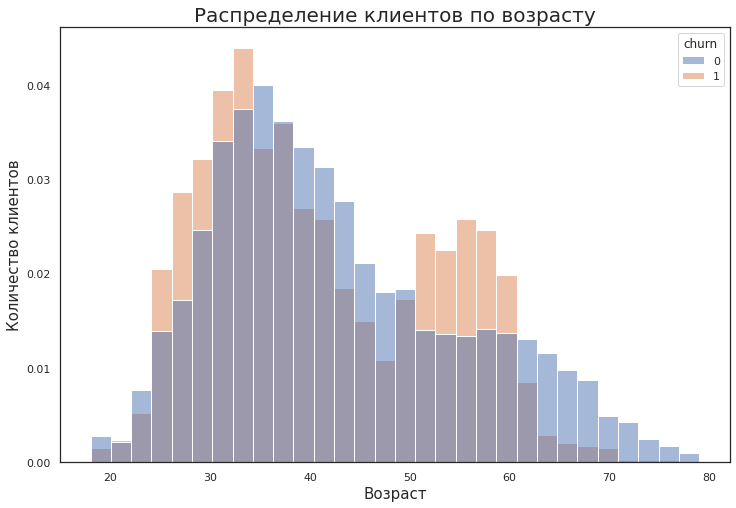

In [40]:
sns.histplot(data=data, 
                 x='age',
                 hue='churn',
                 bins=30,
                 stat="density", 
                 common_norm=False)
plt.title('Распределение клиентов по возрасту',size=20)
plt.xlabel('Возраст',size=15)
plt.ylabel('Количество клиентов',size=15)
plt.show()

Здесь по графике можем наблюдать интервалы оттока по возрасту: 
- от 25 до 35 лет;
- от 50 до 60 лет;

##### Посмотрим распределение клиентов по полу в разрезе оттока.

In [41]:
# посчитаем средний уровень оттока
avg_churn = data['churn'].mean()

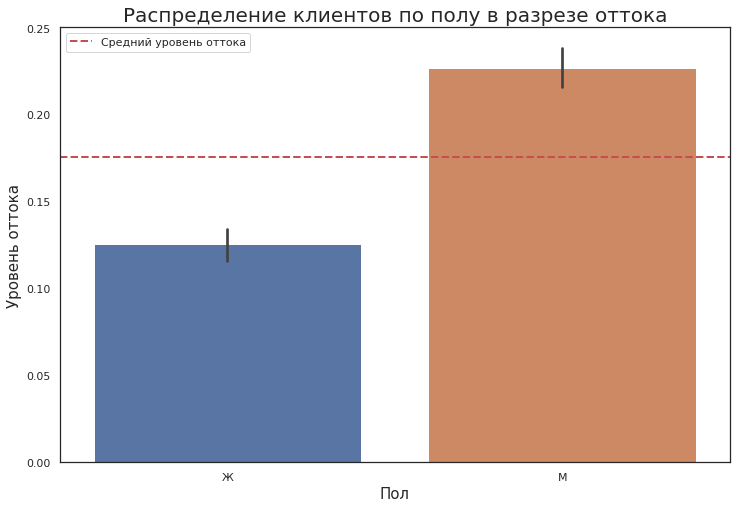

In [42]:
sns.barplot(x = 'gender', 
            y = 'churn', 
            data = data)
plt.axhline(avg_churn, 
            color='r', 
            linestyle='--',
            linewidth=2, 
            label='Средний уровень оттока')
plt.legend(loc='upper left')
plt.title('Распределение клиентов по полу в разрезе оттока', size=20)
plt.xlabel('Пол', size=15)
plt.ylabel('Уровень оттока', size=15);

Уходят из банка больше всего мужчины, чем женщины;

##### Посмотрим распределение клиентов по скоринговому рейтингу в разрезе оттока

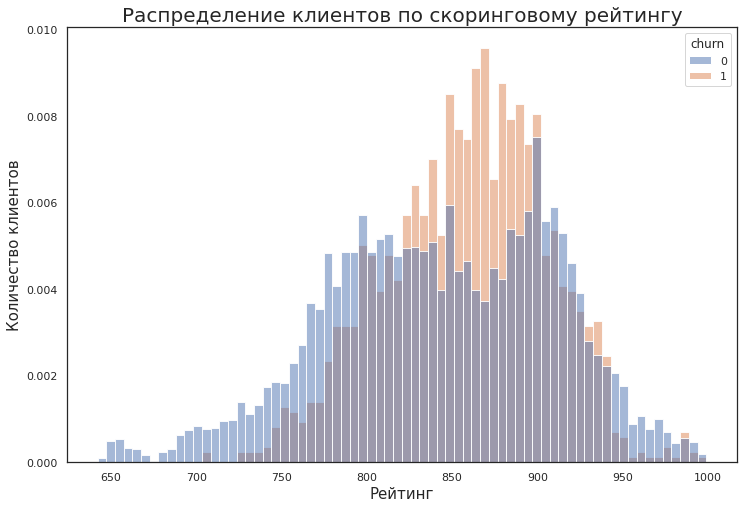

In [43]:
sns.histplot(data=data, 
                 x='score',
                 hue='churn',
                 bins=70,
                 stat="density", 
                 common_norm=False)
plt.title('Распределение клиентов по скоринговому рейтингу',size=20)
plt.xlabel('Рейтинг',size=15)
plt.ylabel('Количество клиентов',size=15)
plt.show()

Интервал оттока по скоринговому рейтингу наблюдается от 820 до 900 баллов;

##### Посмотрим распределение клиентов по количеству продуктов в разрезе оттока.

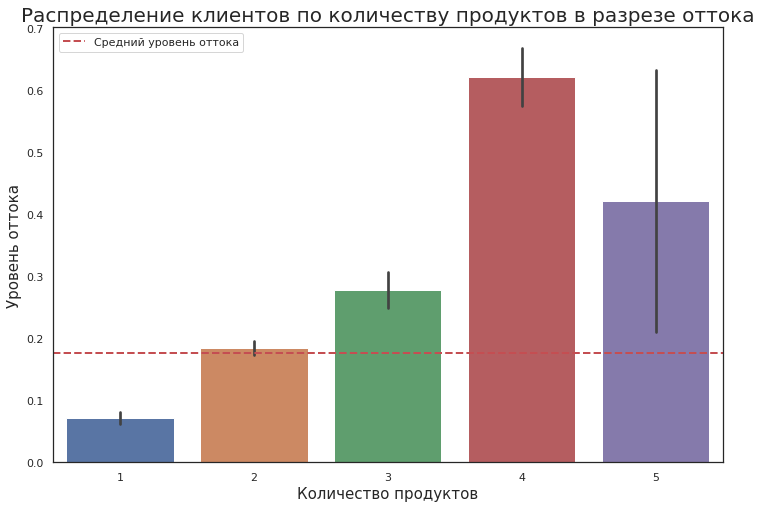

In [44]:
sns.barplot(x = 'products', 
            y = 'churn', 
            data = data)
plt.axhline(avg_churn, 
            color='r', 
            linestyle='--',
            linewidth=2, 
            label='Средний уровень оттока')
plt.legend(loc='upper left')
plt.title('Распределение клиентов по количеству продуктов в разрезе оттока', size=20)
plt.xlabel('Количество продуктов', size=15)
plt.ylabel('Уровень оттока', size=15);

Больше всего уходят клиенты, имеют больше 2х продуктов банка;  
Остаются клиентами банка в основном с 1 или 2 продуктами;

##### Посмотрим распределение клиентов по количеству баллов собственности в разрезе оттока.

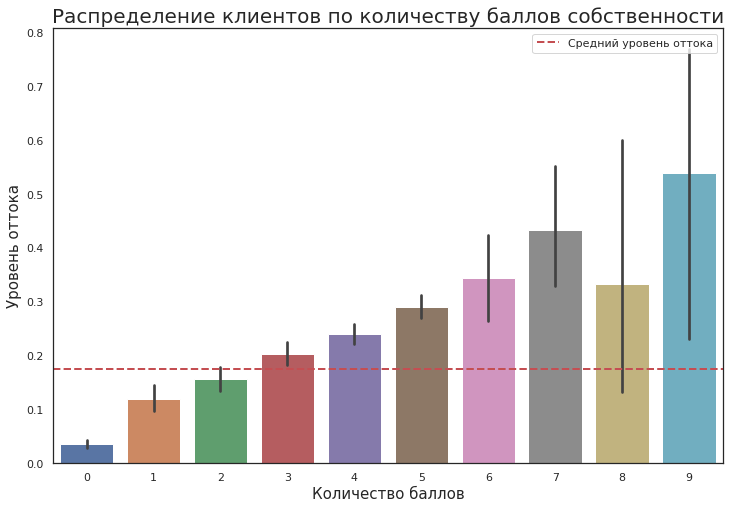

In [45]:
sns.barplot(x = 'equity', 
            y = 'churn', 
            data = data)
plt.axhline(avg_churn, 
            color='r', 
            linestyle='--',
            linewidth=2, 
            label='Средний уровень оттока')
plt.legend(loc='upper right')
plt.title('Распределение клиентов по количеству баллов собственности', size=20)
plt.xlabel('Количество баллов', size=15)
plt.ylabel('Уровень оттока', size=15);

Клиенты имеющие больше 3х баллов собственности, чаще всего уходят из банка;  
У клиентов, которых до 3х баллов собственности, лучше всего удерживаются в банке;

##### Посмотрим распределение клиентов по наличию кредитной карты в разрезе оттока.

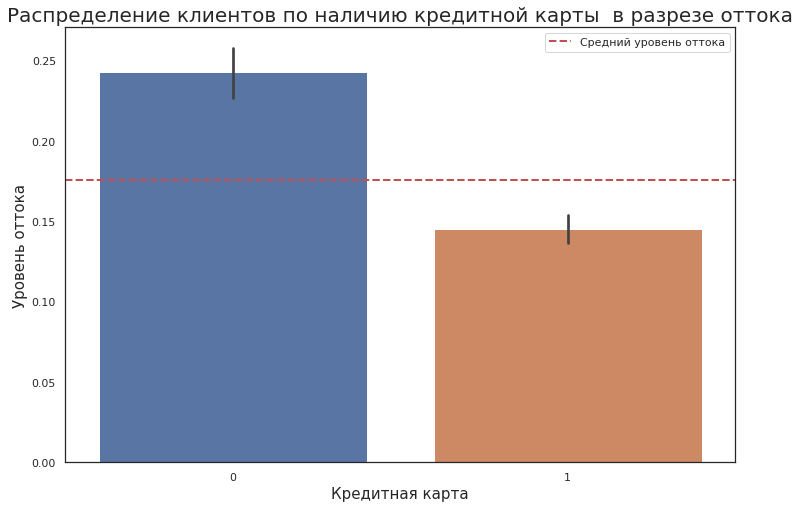

In [46]:
sns.barplot(x = 'credit_card', 
            y = 'churn', 
            data = data)
plt.axhline(avg_churn, 
            color='r', 
            linestyle='--',
            linewidth=2, 
            label='Средний уровень оттока')
plt.legend(loc='upper right')
plt.title('Распределение клиентов по наличию кредитной карты  в разрезе оттока', size=20)
plt.xlabel('Кредитная карта', size=15)
plt.ylabel('Уровень оттока', size=15);

В основном уходят из банка клиенты не имеющие кредитной карты;

##### Посмотрим распределение клиентов по доходу в разрезе оттока.

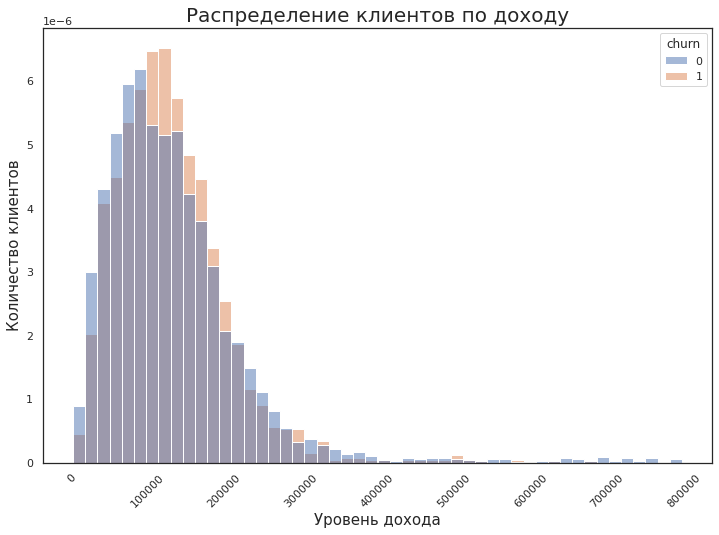

In [47]:
plt.figure(figsize=(12, 8))
sns.histplot(data=data, 
                 x='est_salary',
                 hue='churn',
                 bins=50,
                 stat="density", 
                 common_norm=False)
plt.title('Распределение клиентов по доходу',size=20)
plt.xlabel('Уровень дохода',size=15)
plt.ylabel('Количество клиентов',size=15)
plt.xticks(rotation=45)
plt.show()

Интервал оттока наблюдается у клиентов с доходом от 1млн. до 2млн.;

##### Посмотрим распределение клиентов по балансу в разрезе оттока.

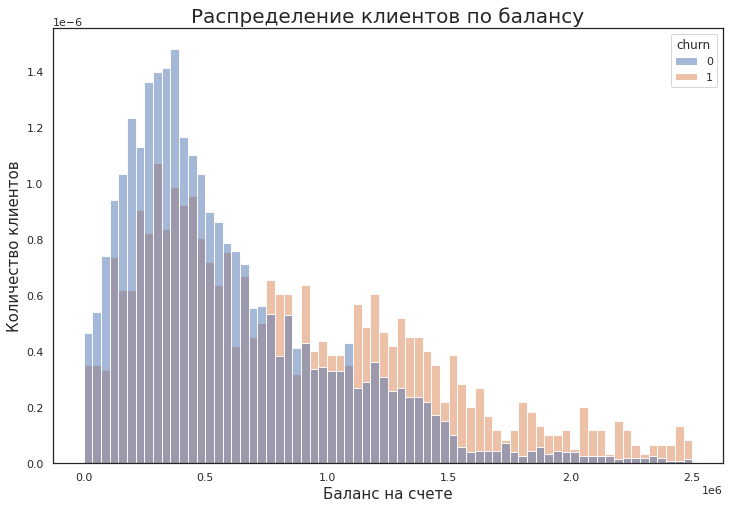

In [48]:
sns.histplot(data=data, 
                 x='balance',
                 hue='churn',
                 bins=70,
                 stat="density", 
                 common_norm=False)
plt.title('Распределение клиентов по балансу',size=20)
plt.xlabel('Баланс на счете',size=15)
plt.ylabel('Количество клиентов',size=15)
plt.show()

Интервал оттока наблюдается у клиентов на балансе, которых, крупная сумма - это от 800тыс. до 2,5млн.;

##### Посмотрим распределение клиентов по активности в разрезе оттока.

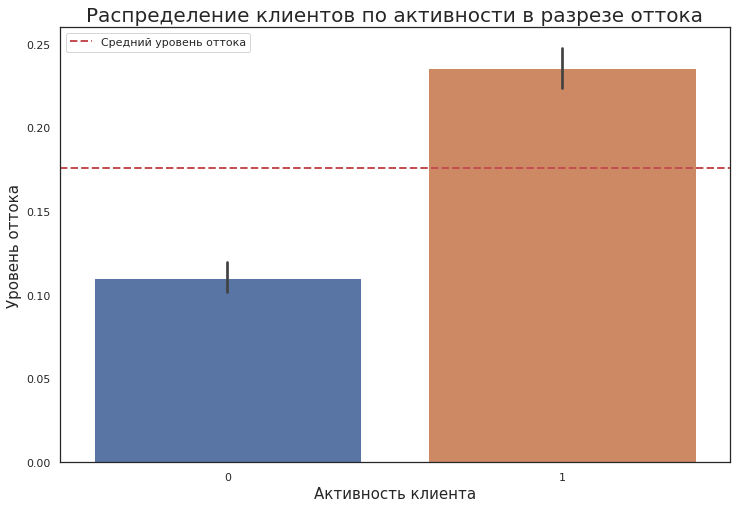

In [49]:
sns.barplot(x = 'last_activity', 
            y = 'churn', 
            data = data)
plt.axhline(avg_churn, 
            color='r', 
            linestyle='--',
            linewidth=2, 
            label='Средний уровень оттока')
plt.legend(loc='upper left')
plt.title('Распределение клиентов по активности в разрезе оттока', size=20)
plt.xlabel('Активность клиента', size=15)
plt.ylabel('Уровень оттока', size=15);

Наблюдается высокий отток у активных клиентов;

##### Посмотрим распределение клиентов по городам в разрезе оттока.

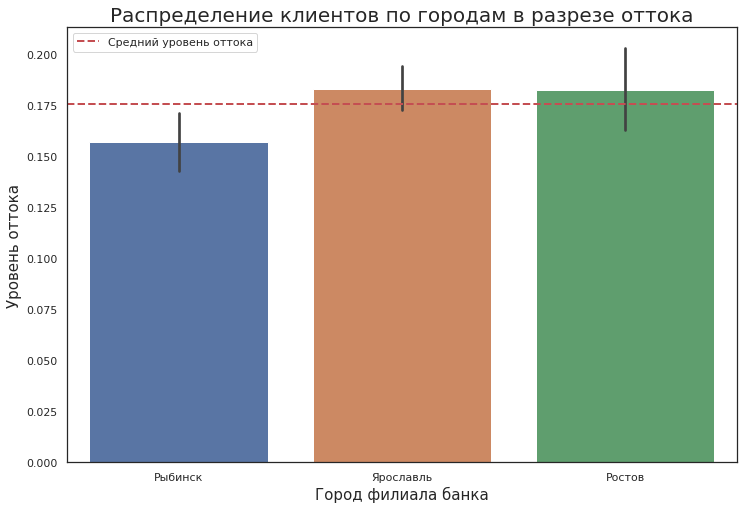

In [50]:
sns.barplot(x = 'city', 
            y = 'churn', 
            data = data)
plt.axhline(avg_churn, 
            color='r', 
            linestyle='--',
            linewidth=2, 
            label='Средний уровень оттока')
plt.legend(loc='upper left')
plt.title('Распределение клиентов по городам в разрезе оттока', size=20)
plt.xlabel('Город филиала банка', size=15)
plt.ylabel('Уровень оттока', size=15);

По городам уровень оттока не сильно отличается.   
В филиалах городов Ярославль и Ростов есть небольшая доля клиентов, которые уходят.  
В Рыбинске таких не наблюдается;

#### Корреляционный анализ признака оттока клиентов с другими признаками.

##### Посмотрим корреляцию оттока клиентов с другими признаками по шкале Чеддока.

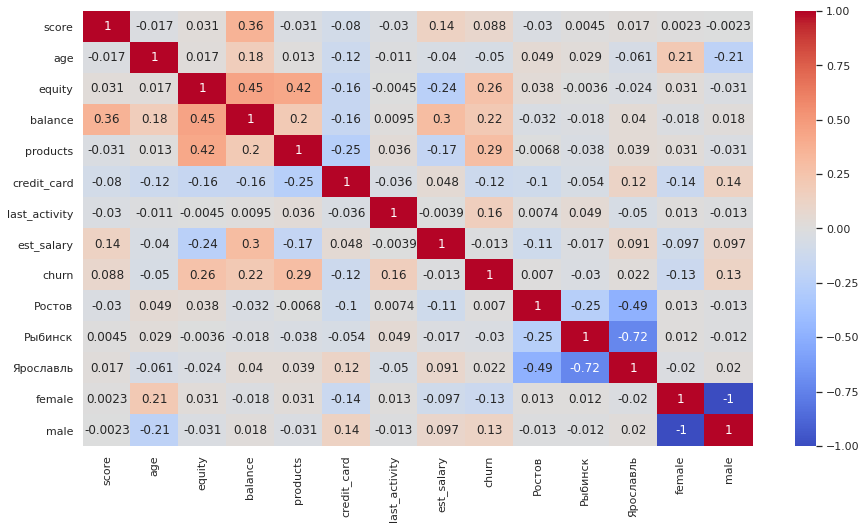

In [51]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), 
            vmin=-1, 
            vmax=1, 
            annot=True, 
            cmap='coolwarm',
            center= 0);

In [52]:
# Рассчитаем корреляционную матрицу Пирсона
correlation_matrix = data.corr(method='pearson')

# Извлечем столбец корреляции с `churn` и уберем отрицательные значения
churn_correlation = correlation_matrix['churn'].drop('churn')

# Преобразуем корреляции в абсолютные значения
absolute_correlation = churn_correlation.abs()

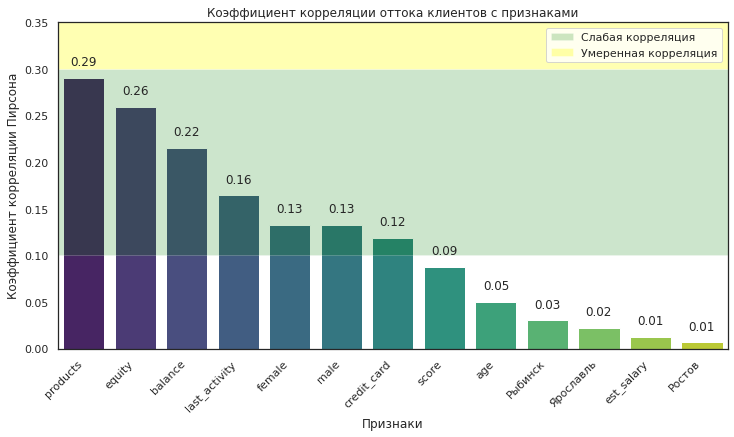

In [53]:
# Отсортируем по убыванию
top_correlation = absolute_correlation.sort_values(ascending=False)

# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=top_correlation.index, 
                       y=top_correlation.values,
                       palette='viridis')

# Добавим числовые значения корреляции поверх столбцов
for index, value in enumerate(top_correlation.values):
    plt.text(index, 
             value + 0.01, 
             f"{value:.2f}", 
             ha='center', 
             va='bottom')

# Настроим цветовые области корреляции на графике
plt.axhspan(0.1, 0.3, facecolor='green', alpha=0.2, label='Слабая корреляция')
plt.axhspan(0.3, 0.5, facecolor='yellow', alpha=0.3, label='Умеренная корреляция')

# Настроим график
plt.title('Коэффициент корреляции оттока клиентов с признаками')
plt.xlabel('Признаки')
plt.ylabel('Коэффициент корреляции Пирсона')
plt.xticks(rotation=45, ha='right')  # Поворот меток для читаемости
plt.ylim(0, 0.35)  # Устанавливаем границы для оси Y

# Добавление легенды
plt.legend(loc='upper right')
plt.show()

Наблюдается слабая связь корреляции оттока клиентов с такими признаками: 
- 'products'(количество продуктов) - 29%;
- 'equity'(количество баллов собственности) - 26%;
- 'balance'(баланс на счете) - 22%;
- 'last_activity'(активность клиента) - 16%;
- 'gender'(по полу женщины) - 13%;
- 'gender'(по полу мужчины) - 13%;
- 'credit_card(кредитные карты) - 12%;
- 'score'(скоринговый балл) - 9%;
- 'age'(возраст) - 5%;
- 'city'(по городу Рыбинск) - 3%;
- 'city'(по городу Ярославль) - 2%;
- 'est_salary'(доход) - 1%;
- 'city'(по городу Ростов) - 1%;

#### Анализ портретов клиентов в разрезе оттока

In [54]:
# Рассчитываем меры центральной тенденции

table = data.groupby('churn').agg(
    avg_score=('score', 'mean'),
    city=('city', lambda x: x.mode()[0]),
    gender=('gender', lambda x: x.mode()[0]),
    avg_age=('age', 'mean'),
    median_age=('age', 'median'),
    equity=('equity', 'median'),
    avg_balance=('balance', 'mean'),
    median_balance=('balance', 'median'),
    products=('products', 'mean'),
    credit_card=('credit_card', lambda x: x.mode()[0]),
    last_activity=('last_activity', lambda x: x.mode()[0]),
    avg_salary=('est_salary', 'mean'),
    median_salary=('est_salary', 'median')
).reset_index()

# Создаем сводную таблицу

table = table.T

# Переименуем столбцы для удобства

table.columns = ['Не отток', 'Отток']

In [55]:
# рассчитаем и добавим столбец с относительной разницей

median_age = data['age'].median()

table['Относительная разница'] = (table
    .apply(lambda row: row['Не отток']/row['Отток'] 
           if isinstance(row ['Не отток'], (int,float)) 
           and isinstance(row ['Отток'], (int, float)) 
           and row['Не отток'] >  median_age 
           and row['Отток'] >  median_age
           else 'не подходит', axis=1)) 

In [56]:
table

,Не отток,Отток,Относительная разница
churn,0,1,не подходит
avg_score,843.563998,858.283165,0.98285
city,Ярославль,Ярославль,не подходит
gender,Ж,М,не подходит
avg_age,42.877585,41.283165,1.038622
median_age,40,39,не подходит
equity,3,4,не подходит
avg_balance,587349.415608,834149.387461,0.70413
median_balance,463761.29,715109.575,0.648518
products,1.75555,2.354551,не подходит


Исходя из данных, можно сделать несколько наблюдений:

- Avg_score (Средний балл): Клиенты с высоким средним баллом более склонны к оттоку;
  
  
- City (Город): Больше всего клиентов в филиале города Ярославль. Количество ушедших и оставшихся одинаково. Можем сделать вывод, что город отделения банка не играет роли в различиях между группами.


- Gender (Пол): Здесь также подтвердилось, что уходят из банка больше всего мужчины, чем женщины;


- Возраст (avg_age, median_age): Средние и медианные показатели клиентов, могут свидетельствовать о том, что более молодые клиенты склонны к оттоку;


- Баллы собственности (equity): Чем больше балл собственности, тем более склонен к оттоку клиент;


- Баланс (avg_balance, median_balance): Средний и медианный баланс у группы с оттоком значительно выше;


- Количество продуктов(products): Клиенты, у которых в банке более 2х продуктов, больше склонны к оттоку;


- Кредитная карта(credit_card): Клиенты имеющие кредитную карту, имеют одинаковый признак по оттоку и не оттоку;


- Активность (last_activity): Активные пользователи более склонны к оттоку;  


- Уровень дохода (avg_salary): По среднему значению люди с меньшим доходом находятся в оттоке;


- Уровень дохода (median_salary): По медианному наоборот люди с большим доходом находятся в оттоке. Здесь лучше учитывать медианное значение, так как медиана более устойчива к выбросам и даёт более реалистичное представление о том, сколько зарабатывает клиент;



**Портрет типичного отточного клиента:**  
- Мужчины в возрасте до 40 лет;
- Высокий скоринговый балл - 858, 
- Пользуются более, чем 2-мя продуктами банка;
- И имеющие более высокий доход и баланс на счетах;  

*Эти клиенты вероятно, не удовлетворены обслуживанием или предложениями банка.*

**Портрет лояльного клиента:**
- Женщины среднего возраста;
- Имеющие средний уровень дохода и умеренный скоринговый балл;
- Имеют 1 или 2 продукта банка и небольшой баланс на счетах;  

*Демонстрируют стабильное, но не слишком активное поведение.*

### Формирование и проверка гипотез

#### Проверим гипотезу: Различия среднего дохода между теми клиентами, которые ушли и теми, которые остались.

Формулируем гипотезы:  
  
H0 - Средний доход ушедших клиентов = Среднему доходу оставшихся клиентов  
H1 - Средний доход ушедших клиентов != Среднему доходу оставшихся клиентов
  
уровень значимости 5%

Чтобы понять, можно ли применять t-тест, нужно проверить следующие условия:
- Выборки не зависят друг от друга;
- Выборочные средние нормально распределены. Это условие не должно быть препятствием благодаря ЦПТ. Если размер выборки составляет хотя бы несколько десятков значений, то выборочные средние, которые можно получить из одной и той же выборки, будут распределены близко к нормальному вокруг истинного среднего этой выборки. Это так, даже если сама выборка не распределена нормально;
- Дисперсии рассматриваемых выборок равны. равенство дисперсий (в случае неравенства дисперсий или разнице в размере выборок более чем на 25% используется поправка Уэлча через настройку equal_var=False);
- Отсутствие явных выбросов;

*Независимость выборок* - клиенты, которые ушли и которые остались не пересекаются между собой, то есть не могут попасть и в первую и вторую выборки;  
*Нормальность распределения* -у нас достаточная выборка, чтобы сработала ЦПТ; 

In [57]:
# Выявление и фильтрация выбросов с помощью межквартильного диапазона (IQR)
q1, q3 = data['est_salary'].quantile(0.25), data['est_salary'].quantile(0.75)
iqr = q3 - q1
salary_f = data[(data['est_salary'] >= (q1 - 1.5 * iqr)) & (data['est_salary'] <= (q3 + 1.5 * iqr))]

# Разделение на две группы
left_customers = salary_f[salary_f['churn'] == 1] ['est_salary'] # ушедшие клиенты
stayed_customers = salary_f[salary_f['churn'] == 0]['est_salary'] # оставшиеся клиенты

H0: Дисперсии в разных группах равны.   
H1: Дисперсии в разных группах не равны. 

In [58]:
# Проверка равенства дисперсий (тест Левене)

stat_levene, p_value = st.levene(left_customers, stayed_customers)

# Выводим результаты
print(f'Statistic: {stat_levene}, p-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: дисперсии не равны")
else:
    print("Не отвергаем нулевую гипотезу: дисперсии равны")

Statistic: 12.72026835799562, p-value: 0.00036354128790352946
Отвергаем нулевую гипотезу: дисперсии не равны


Cуществует статистически значимая разница в дисперсиях, поэтому будем применять поправку Уэлча "equal_var=False";

- У нас независимые выборки;
- Нормальное распределение;
- Отфильтрованные выбросы;
- Присутствует неравенство дисперсий;  

Будем применять ttest с поправкой Уэлча из-за неравенства дисперсий.

In [59]:
t_stat, p_value = st.ttest_ind(stayed_customers, left_customers, equal_var=False)

alpha = 0.05
print(f"t-статистика: {t_stat:}")
print(f"p-value: {p_value:}")

if p_value < 0.05:
    print("Различия между доходами ушедших и оставшихся клиентов значимы. Отвергаем нулевую гипотезу.")
else:
    print("Нет значимых различий между доходами ушедших и оставшихся клиентов. Не отвергаем нулевую гипотезу.")

t-статистика: -2.5070552576377736
p-value: 0.012236536015988484
Различия между доходами ушедших и оставшихся клиентов значимы. Отвергаем нулевую гипотезу.


Есть статистически значимые различия между средними доходами клиентов, которые ушли, и тех, кто остался. Мы не можем с уверенностью сказать, что доход не влияет на решение клиента остаться или уйти.   

#### Проверим гипотезу: Различия среднего скорингового балла между теми клиентами, которые ушли и теми, которые остались.

Формулируем гипотезы:

H0 - Средний скоринговый балл ушедших клиентов = Среднему скоринговому баллу оставшихся клиентов  
H1 - Средний скоринговый балл ушедших клиентов != Среднему скоринговому баллу оставшихся клиентов

уровень значимости 5%

In [60]:
# Выявление и фильтрация выбросов с помощью межквартильного диапазона (IQR)
q1, q3 = data['score'].quantile(0.25), data['score'].quantile(0.75)
iqr = q3 - q1
score_f = data[(data['score'] >= (q1 - 1.5 * iqr)) & (data['score'] <= (q3 + 1.5 * iqr))]

# Разделение на две группы
left_customers_score = score_f[score_f['churn'] == 1] ['score'] # ушедшие клиенты
stayed_customers_score = score_f[score_f['churn'] == 0]['score'] # оставшиеся клиенты

H0: Дисперсии в разных группах равны.     
H1: Дисперсии в разных группах не равны. 

In [61]:
# Проверка равенства дисперсий (тест Левене)

stat_levene, p_value = st.levene(left_customers_score, stayed_customers_score)

# Выводим результаты
print(f'Statistic: {stat_levene}, p-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: дисперсии не равны")
else:
    print("Не отвергаем нулевую гипотезу: дисперсии равны")

Statistic: 310.14198564385384, p-value: 2.4534062643127443e-68
Отвергаем нулевую гипотезу: дисперсии не равны


Существует статистически значимая разница в дисперсиях;

Чтобы понять, можно ли применять t-тест, нужно проверить следующие условия:
- Выборки не зависят друг от друга;
- Выборочные средние нормально распределены. Это условие не должно быть препятствием благодаря ЦПТ. Если размер выборки составляет хотя бы несколько десятков значений, то выборочные средние, которые можно получить из одной и той же выборки, будут распределены близко к нормальному вокруг истинного среднего этой выборки. Это так, даже если сама выборка не распределена нормально;
- Дисперсии рассматриваемых выборок равны. равенство дисперсий (в случае неравенства дисперсий или разнице в размере выборок более чем на 25% используется поправка Уэлча через настройку equal_var=False);
- Отсутствие явных выбросов;

*Независимость выборок* - клиенты, которые ушли и которые остались не пересекаются между собой, то есть не могут попасть и в первую и вторую выборки;  
*Нормальность распределения* -у нас достаточная выборка, чтобы сработала ЦПТ; 

- У нас независимые выборки;
- Нормальное распределение;
- Отфильтрованные выбросы;
- Присутствует неравенство дисперсий;  

Будем применять ttest с поправкой Уэлча из-за неравенства дисперсий.

In [62]:
t_stat, p_value = st.ttest_ind(stayed_customers_score, left_customers_score, equal_var=False)

alpha = 0.05
print(f"t-статистика: {t_stat:}")
print(f"p-value: {p_value:}")

if p_value < 0.05:
    print("Различия между скоринговыми баллами значимы. Отвергаем нулевую гипотезу.")
else:
    print("Нет значимых различий между скоринговыми баллами. Не отвергаем нулевую гипотезу.")


t-статистика: -9.88759706449385
p-value: 9.903081292027593e-23
Различия между скоринговыми баллами значимы. Отвергаем нулевую гипотезу.


Мы отвергаем нулевую гипотезу, что говорит о статистически значимых различиях в скоринговых баллах между клиентами, которые ушли, и теми, кто остался. Это означает, что скоринговый балл имеет влияние на отток клиентов.

### Подведение промежуточных итогов

Исходя из проведенного анализа, можем выбрать признаки по отточным клиентам для сегментации: 
- Клиенты в возрасте от 25 до 35 лет;
- Клиенты в возрасте от 50 до 60 лет;
- В основном это будут мужчины;
- Скоринговый балл у таких клиентов от 820 до 900;
- Клиенты, у которых нет продуктов банка, либо их больше 2х;
- Клиенты имеющие больше 3х баллов собственности;
- Клиенты, у которых высокий баланс средств на счете;

### Сегментация

Выделим 3 категории сегметации и проведем их анализ: 
- 1 сегмент: Мужчины в возрасте от 25 до 35 лет с баллом собственности больше 3х;
- 2 сегемнт: Клиенты имеющие более 2х продуктов банка и балл скоринга от 820 до 900;
- 3 сегмент: Клиенты от 50 до 60 лет с балансом выше 800т.руб;

In [63]:
# Фильтрация клиентов: мужчины в возрасте от 25 до 35 лет имеющие балл собственности больше 3
segment_1 = data[
    (data['gender'] == 'М') & 
    (data['age'] >= 25) & (data['age'] <= 35) &
    (data['equity'] > 3)
]
# Просмотр отфильтрованного сегмента
segment_1

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
4,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1
14,815,Ярославль,М,35,5,547499.87,2,1,1,105883.26,0,0,0,1,0,1
45,826,Ярославль,М,31,4,333330.99,1,1,1,46981.53,0,0,0,1,0,1
77,937,Ярославль,М,33,5,2061152.96,2,1,1,280670.62,1,0,0,1,0,1
81,850,Рыбинск,М,34,5,351583.16,4,0,1,115354.97,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9882,756,Рыбинск,М,26,5,311073.33,3,1,0,17597.52,0,0,1,0,0,1
9909,885,Ярославль,М,35,5,1133520.90,2,0,0,175463.34,1,0,0,1,0,1
9923,860,Рыбинск,М,30,5,605635.33,1,1,1,99368.24,0,0,1,0,0,1
9972,834,Ростов,М,27,4,192776.27,2,0,1,26570.39,0,1,0,0,0,1


In [64]:
# Проверка, есть ли клиенты в этом сегменте
if segment_1.empty:
    print("Нет клиентов в заданном сегменте.")
else:
    # Количество клиентов в сегменте
    total_clients_segment = segment_1.shape[0]
    
    # Количество ушедших клиентов в сегменте
    churned_clients_segment = segment_1[segment_1['churn'] == 1].shape[0]
    
    # Расчет уровня оттока
    churn_rate_segment = churned_clients_segment / total_clients_segment
    
    # Расчет средней и общей ценности (средний и общий баланс)
    average_balance_segment = segment_1['balance'].mean()
    total_balance_segment = segment_1['balance'].sum()

    # Результаты
    print(f"Признаки сегмента: Мужчины, 25-35 лет, более 3 баллов собственности.")
    print(f"Общее количество клиентов в сегменте: {total_clients_segment}")
    print(f"Количество ушедших клиентов в сегменте: {churned_clients_segment}")
    print(f"Уровень оттока: {churn_rate_segment:.2%}")
    print(f"Средний баланс в сегменте: {average_balance_segment:,.2f} руб.")
    print(f"Общий баланс в сегменте: {total_balance_segment:,.2f} руб.")

Признаки сегмента: Мужчины, 25-35 лет, более 3 баллов собственности.
Общее количество клиентов в сегменте: 684
Количество ушедших клиентов в сегменте: 280
Уровень оттока: 40.94%
Средний баланс в сегменте: 717,650.28 руб.
Общий баланс в сегменте: 490,872,791.96 руб.


***СЕГМЕНТ №1***

**Общее количество клиентов:** 684;  
**Количество ушедших клиентов:** 280;  
**Уровень оттока:** 40.94%;  
**Средний баланс:** 717,650.28 руб;  
**Общий баланс:** 490,872,791.96 руб;  
  
Наблюдается высокий уровень оттока в данном сегменте - **40.94%**;  

Почти половина клиентов из данного сегмента уже ушли, что говорит о высоком риске и необходимости принятия мер по снижению оттока.  

Средний баланс клиентов указывает на их финансовую значимость;  
Общий баланс сегмента достачно высокий, поэтому даже прирост в удержании таких клиентов, может заметно повлиять на общую прибыльность банка;  
Категория клиентов в этом сегменте, это мужчины от 25 до 35 лет - с которыми можно строить долгосрочные отношения с банком;

In [65]:
# Фильтрация клиентов: Клиенты имеющие более 2х продуктов банка и балл скоринга от 820 до 900

segment_2 = data[
    (data['products'] > 2) &
    (data['score'] >= 820) & (data['score'] <= 900)
]

# Просмотр отфильтрованного сегмента
segment_2

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
1,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
5,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0,0,1,0,0,1
26,898,Ярославль,Ж,62,3,364049.27,3,0,1,50661.84,0,0,0,1,1,0
72,873,Ярославль,М,39,5,915959.85,3,0,1,154034.62,1,0,0,1,0,1
81,850,Рыбинск,М,34,5,351583.16,4,0,1,115354.97,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,862,Ростов,М,46,3,1784723.84,4,1,1,202524.28,1,1,0,0,0,1
9962,893,Ярославль,Ж,49,5,1571192.11,4,1,1,151217.99,1,0,0,1,1,0
9988,889,Ярославль,М,35,4,880534.89,4,1,1,126564.61,0,0,0,1,0,1
9989,860,Ярославль,Ж,67,4,637403.26,3,0,0,37469.87,0,0,0,1,1,0


In [66]:
# Проверка наличия клиентов в сегменте
if segment_2.empty:
    print("Нет клиентов в заданном сегменте.")
else:
    # Количество клиентов в сегменте
    total_clients_segment = segment_2.shape[0]
    
    # Количество ушедших клиентов в сегменте
    churned_clients_segment = segment_2[segment_2['churn'] == 1].shape[0]
    
    # Расчет уровня оттока
    churn_rate_segment = churned_clients_segment / total_clients_segment
    
    # Расчет средней и общей ценности (средний и общий баланс)
    average_balance_segment = segment_2['balance'].mean()
    total_balance_segment = segment_2['balance'].sum()

    # Вывод результатов
    print(f"Признаки сегмента: > 2 продуктов банка, скоринговый балл 820-900.")
    print(f"Общее количество клиентов в сегменте: {total_clients_segment}")
    print(f"Количество ушедших клиентов в сегменте: {churned_clients_segment}")
    print(f"Уровень оттока: {churn_rate_segment:.2%}")
    print(f"Средний баланс в сегменте: {average_balance_segment:,.2f} руб.")
    print(f"Общий баланс в сегменте: {total_balance_segment:,.2f} руб.")

Признаки сегмента: > 2 продуктов банка, скоринговый балл 820-900.
Общее количество клиентов в сегменте: 694
Количество ушедших клиентов в сегменте: 278
Уровень оттока: 40.06%
Средний баланс в сегменте: 780,825.57 руб.
Общий баланс в сегменте: 538,769,642.25 руб.


***СЕГМЕНТ № 2***

**Общее количество клиентов в сегменте:** 694;  
**Количество ушедших клиентов в сегменте:** 278;  
**Уровень оттока:** 40.06%;  
**Средний баланс в сегменте:** 780,825.57 руб;  
**Общий баланс в сегменте:** 538,769,642.25 руб;  

Наблюдается высокий уровень оттока в данном сегменте - **40.06%**;

Клиенты данного сегмента изначально считаются более лояльными, так как имеют несколько продуктов и высокий скоринговый балл; Потеря почти половины таких клиентов — сигнал о недовольстве работы банка или неподходящих предложениях;  

Средний баланс клиентов указывает на их финансовую значимость;  
Общий баланс сегмента достачно высокий, поэтому даже прирост в удержании таких клиентов, может заметно повлиять на общую прибыльность банка;

Высокий скоринговый балл (820-900) говорит о хорошей кредитоспособности, платежеспособности и потенциально высоком доходе клиентов;
Клиенты уже пользуются более чем 2 продуктами, что свидетельствует об их готовности к комплексному взаимодействию с банком;


In [67]:
# Фильтрация клиентов: Клиенты от 50 до 60 лет имеющие баланс средств более 800000

segment_3 = data[
    (data['age'] >= 50) & (data['age'] <= 60) & 
    (data['balance'] > 800000) 
]

# Просмотр отфильтрованного сегмента
segment_3

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
3,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
5,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0,0,1,0,0,1
8,923,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0,0,0,1,0,1
36,822,Ярославль,М,60,5,1472483.77,1,1,1,89132.67,0,0,0,1,0,1
41,814,Рыбинск,М,56,2,1067536.40,2,1,0,95563.19,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9872,865,Ярославль,М,51,6,904732.82,4,1,0,216582.58,1,0,0,1,0,1
9877,830,Ярославль,М,53,4,1220272.89,2,1,0,88456.17,1,0,0,1,0,1
9944,769,Ярославль,Ж,60,4,1409579.65,2,1,1,66316.67,0,0,0,1,1,0
9986,822,Ярославль,М,58,5,1434857.91,2,0,1,83442.41,1,0,0,1,0,1


In [68]:
# Проверка наличия клиентов в сегменте
if segment_3.empty:
    print("Нет клиентов в заданном сегменте.")
else:
    # Количество клиентов в сегменте
    total_clients_segment = segment_3.shape[0]
    
    # Количество ушедших клиентов в сегменте
    churned_clients_segment = segment_3[segment_3['churn'] == 1].shape[0]
    
    # Расчет уровня оттока
    churn_rate_segment = churned_clients_segment / total_clients_segment
    
    # Расчет средней и общей ценности (средний и общий баланс)
    average_balance_segment = segment_3['balance'].mean()
    total_balance_segment = segment_3['balance'].sum()

    # Вывод результатов
    print(f"Признаки сегмента: >  50-60 лет, баланс более 800000.")
    print(f"Общее количество клиентов в сегменте: {total_clients_segment}")
    print(f"Количество ушедших клиентов в сегменте: {churned_clients_segment}")
    print(f"Уровень оттока: {churn_rate_segment:.2%}")
    print(f"Средний баланс в сегменте: {average_balance_segment:,.2f} руб.")
    print(f"Общий баланс в сегменте: {total_balance_segment:,.2f} руб.")

Признаки сегмента: >  50-60 лет, баланс более 800000.
Общее количество клиентов в сегменте: 504
Количество ушедших клиентов в сегменте: 223
Уровень оттока: 44.25%
Средний баланс в сегменте: 1,285,943.78 руб.
Общий баланс в сегменте: 648,115,665.61 руб.


***СЕГМЕНТ № 3***

**Общее количество клиентов в сегменте:** 504;  
**Количество ушедших клиентов в сегменте:** 223;  
**Уровень оттока:** 44.25%;  
**Средний баланс в сегменте:** 1,285,943.78 руб;  
**Общий баланс в сегменте:** 648,115,665.61 руб;  

Уровень оттока в **44.25%** — это критический показатель для клиентов с таким уровнем активов;

Средний баланс клиентов указывает на их высокую финансовую значимость;  
Общий баланс сегмента очень высокий. Потеря таких клиентов существенно отражается на общей прибыльности и устойчивости банка;

Клиенты в возрасте 50-60 лет часто рассматривают свои сбережения как важный элемент подготовки к пенсии или поддержания уровня жизни;  
Этот сегмент, вероятно, склонен к долгосрочному партнерству, но при этом предъявляет высокие требования к качеству обслуживания и стабильности предложений;

In [69]:
# Создадим функцию для автоматического вычисления метрик сегмента по заданным условиям

def calculate_segment_metrics(data, conditions):
    
    # Копируем DataFrame для сегментации
    segment_df = data.copy()
    
    # Применение условий фильтрации по каждому параметру
    for column, (value, operator) in conditions.items():
        if operator == '==':
            segment_df = segment_df[segment_df[column] == value]
        elif operator == '>':
            segment_df = segment_df[segment_df[column] > value]
        elif operator == '>=':
            segment_df = segment_df[segment_df[column] >= value]
        elif operator == '<':
            segment_df = segment_df[segment_df[column] < value]
        elif operator == '<=':
            segment_df = segment_df[segment_df[column] <= value]
        elif operator == 'range':
            segment_df = segment_df[(segment_df[column] >= value[0]) & (segment_df[column] <= value[1])]
    
    # Проверка, пустой ли сегмент
    if segment_df.empty:
        return {"Признаки": "Сегмент пуст", 
                "Общее количество клиентов": 0,
                "Количество ушедших клиентов": 0, 
                "Уровень оттока (%)": 0, 
                "Средний баланс (руб.)": 0, 
                "Общий баланс (руб.)": 0}

    # Расчет метрик сегмента
    total_clients = segment_df.shape[0]
    churned_clients = segment_df[segment_df['churn'] == 1].shape[0]
    churn_rate = churned_clients / total_clients * 100
    avg_balance = segment_df['balance'].mean()
    total_balance = segment_df['balance'].sum()
    
    # Формирование результатов
    return {
        "Признаки": conditions,
        "Общее количество клиентов": total_clients,
        "Количество ушедших клиентов": churned_clients,
        "Уровень оттока (%)": round(churn_rate, 2),
        "Средний баланс (руб.)": round(avg_balance, 2),
        "Общий баланс (руб.)": round(total_balance, 2)
    }

# Условия для каждого сегмента в формате {'column_name': ('value', 'operator')}
segment_conditions = {
    "Сегмент 1": {
        "gender": ('М', '=='),
        "age": ((25, 35), 'range'),
        "equity": (3, '>')
    },
    "Сегмент 2": {
        "products": (2, '>'),
        "score": ((820, 900), 'range')
    },
    "Сегмент 3": {
        "age": ((50, 60), 'range'),
        "balance": (800000, '>')
    }
}

# Автоматический расчет метрик для всех сегментов
segments_results = {segment: calculate_segment_metrics(data, conditions) 
                    for segment, conditions in segment_conditions.items()}

# Вывод результатов
for segment_name, metrics in segments_results.items():
    print(f"{segment_name}:")
    for key, value in metrics.items():
        print(f"  {key}: {value}")
    print()


Сегмент 1:
  Признаки: {'gender': ('М', '=='), 'age': ((25, 35), 'range'), 'equity': (3, '>')}
  Общее количество клиентов: 684
  Количество ушедших клиентов: 280
  Уровень оттока (%): 40.94
  Средний баланс (руб.): 717650.28
  Общий баланс (руб.): 490872791.96

Сегмент 2:
  Признаки: {'products': (2, '>'), 'score': ((820, 900), 'range')}
  Общее количество клиентов: 694
  Количество ушедших клиентов: 278
  Уровень оттока (%): 40.06
  Средний баланс (руб.): 780825.57
  Общий баланс (руб.): 538769642.25

Сегмент 3:
  Признаки: {'age': ((50, 60), 'range'), 'balance': (800000, '>')}
  Общее количество клиентов: 504
  Количество ушедших клиентов: 223
  Уровень оттока (%): 44.25
  Средний баланс (руб.): 1285943.78
  Общий баланс (руб.): 648115665.61



Если изменятся критерии или данные, нужно будет поменять только словарь **segment_conditions**.   

Добавляете новые сегменты, просто добавив новые условия в словарь.

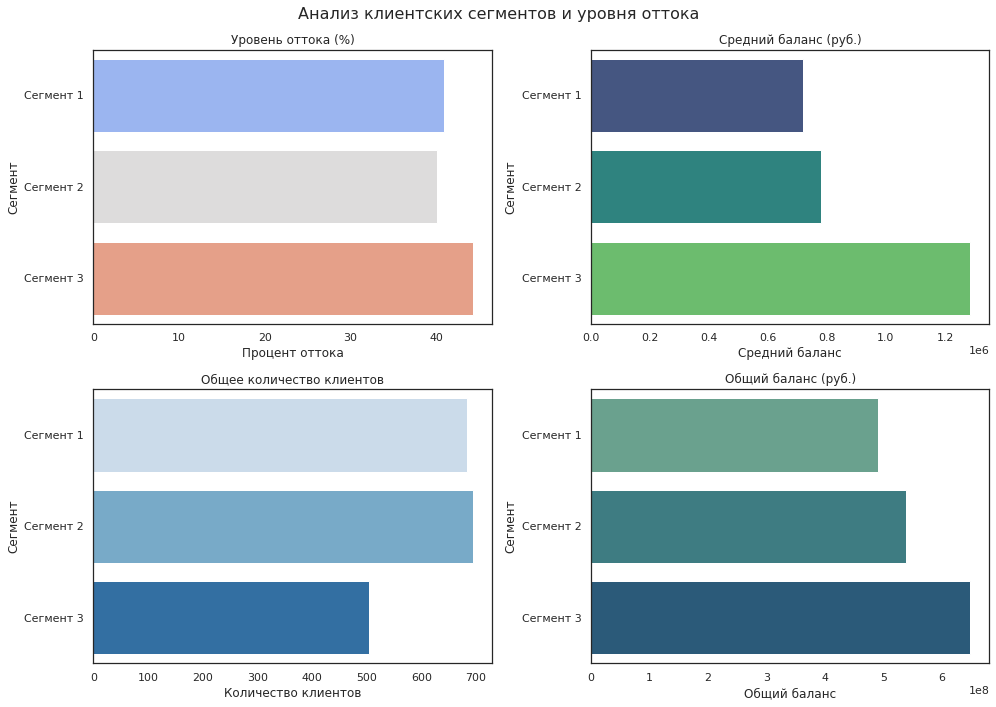

In [70]:
# Преобразование данных в DataFrame для визуализации
df_segments = pd.DataFrame(segments_results).T

# Графики
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Анализ клиентских сегментов и уровня оттока", fontsize=16)

# Уровень оттока
sns.barplot(x=df_segments['Уровень оттока (%)'], y=df_segments.index, ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title('Уровень оттока (%)')
axes[0, 0].set_xlabel('Процент оттока')
axes[0, 0].set_ylabel('Сегмент')

# Средний баланс
sns.barplot(x=df_segments['Средний баланс (руб.)'], y=df_segments.index, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Средний баланс (руб.)')
axes[0, 1].set_xlabel('Средний баланс')
axes[0, 1].set_ylabel('Сегмент')

# Общее количество клиентов
sns.barplot(x=df_segments['Общее количество клиентов'], y=df_segments.index, ax=axes[1, 0], palette='Blues')
axes[1, 0].set_title('Общее количество клиентов')
axes[1, 0].set_xlabel('Количество клиентов')
axes[1, 0].set_ylabel('Сегмент')

# Общее значение баланса
sns.barplot(x=df_segments['Общий баланс (руб.)'], y=df_segments.index, ax=axes[1, 1], palette='crest')
axes[1, 1].set_title('Общий баланс (руб.)')
axes[1, 1].set_xlabel('Общий баланс')
axes[1, 1].set_ylabel('Сегмент')

# Отображение графиков
plt.tight_layout()
plt.show()

**Самый высокий уровень оттока в Сегменте 3** — 44.25%;  
**Сегмент 1 имеет уровень оттока** 40.94%;  
**Наименьший показатель в Сегменте 2** — 40.06%;  
  
**В Сегменте 3 самый высокий средний баланс** — около 1,285,943 руб;  
**В Сегменте 2 и Сегменте 1 средний баланс ниже** - 780,825 и 717,650 руб. соответственно;    

**Сегмент 3 имеет самый высокий общий баланс среди клиентов** — более 648 млн руб;  
**Сегмент 2 и Сегмент 1** — общий баланс составляет 538 млн руб. и 490 млн руб. соответственно;  

### Приоритезация сегментов

**Сегмент №3** является приоритетным для удержания и развития: 
1.	Финансовая значимость:
    - Клиенты с такими балансами — это важная целевая аудитория, особенно в условиях повышенной конкуренции;
2.	Высокий уровень оттока:
    - Потеря 44.25% клиентов — это тревожный сигнал, который указывает на необходимость пересмотра предложений и обслуживания для этого сегмента;
3.	Потенциал для удержания:
    - Учитывая возрастную группу, клиенты могут быть заинтересованы в предложениях, направленных на стабильное управление капиталом, вклады и планирование будущего;


**Сегмент №2** можно отнести к высокому приоритету: 
1.	Финансовая значимость:
    - Высокие средние и общие балансы указывают на то, что удержание этих клиентов может значительно повлиять на прибыльность;
2.	Высокий уровень оттока:
    - Потеря 40.06% клиентов в этом сегменте — это критический уровень, который требует активных мер по удержанию;
3.	Потенциал для развития:
    - Клиенты с высоким скорингом и несколькими продуктами, вероятно, будут открыты для дальнейшего взаимодействия, если их потребности будут учтены;



**Сегмент №1** также имеет высокий приоритет: 
1.	Финансовая значимость:
    - Высокий общий баланс и средний баланс клиентов, уход таких клиентов приводит к значительным финансовым потерям;
2.	Высокий уровень оттока:
    - Необходимо сфокусироваться на разработке стратегий удержания, так как потеря 40.94% клиентов указывает на проблему, требующую внимания;
3.	Потенциал для развития:
    - Клиенты в возрасте 25-35 лет — перспективная группа, поскольку их доходы и активность могут расти с возрастом;
    - Удержание их сейчас может привести к увеличению их вклада в будущем;

### Формирование рекомендаций

Основные рекомендации по **сегменту №3**:
- Предлагать долгосрочные вклады с особыми условиями и инвестиционные продукты с минимальными рисками;
- Включить в пакет услуг премиальное обслуживание, которое обеспечит индивидуальный подход и повышенное внимание к запросам клиентов;
- Создать программы лояльности, ориентированные на клиентов с высокими балансами, которые будут включать в себя консультации, премиальные программы страхования и персонализированные предложения;
- Предложить программы пенсионного планирования, а также комплексные пакеты услуг для сохранения и роста активов;

Основные рекомендации по **сегменту №2**:
- Разработать индивидуальные предложения, например, сниженные ставки по кредитам или повышенные проценты по вкладам для клиентов с таким уровнем скоринга;
- Вовлечь клиентов в премиум-сервисы и дополнительные услуги;
- Включить в программы бонусы за использование дополнительных услуг или переход на премиальные продукты;
- Оптимизировать сервисы, которыми пользуются клиенты (например, улучшение мобильного приложения банка, упрощение платежных операций), чтобы устранить барьеры и повысить удовлетворенность.

Основные рекомендации по **сегменту №1**:
- Разработайте специальные предложения, нацеленные на удержание, например, повышенные проценты на вклады или премиальные кредитные карты;
- Программы с бонусами и привилегиями для клиентов с высоким уровнем собственности;
- Ипотечные программы, автокредиты с пониженными ставками и бонусами;
- Установите прямую связь с клиентами этого сегмента, например, через премиум-обслуживание или выделенного менеджера;

### Вывод

1. **Загрузили данные и изучили информацию;**
2. **Предобработка данных:**
    - Привели названия столбцов к нужному виду;
    - Привели аномальные значения в столбцах 'products','age','balance' и 'est_salary' в порядок;
    - Найдены пропущенные значения в 2х столбцах;
    - В столбце 'age'(возраст) пропуски удалили;
    - В столбце 'balance'(баланс на счете) оставили пропуски без изменений;
    - Заменили тип данных в столбцах 'age' и 'score';
    - Явных и неявных дубликатов не найдено;
    - Применили кодирование категориальных переменных в столбцах 'city' и 'gender' в бинарные;
3. **Исследовательский анализ данных:**
    - Большая часть уходящих клиентов находится в интервале от 25 до 35 лет и от 50 до 60 лет;
    - Уходят из банка больше всего мужчины, чем женщины;
    - Интервал оттока по скоринговому рейтингу наблюдается от 820 до 900 баллов;
    - Больше всего уходят клиенты, имеют больше 2х продуктов банка;
    - Клиенты имеющие больше 3х баллов собственности, чаще всего уходят из банка;  
    - В основном уходят из банка клиенты не имеющие кредитной карты;
    - Интервал оттока наблюдается у клиентов с доходом от 1млн. до 2млн.;
    - Интервал оттока наблюдается у клиентов на балансе, которых, крупная сумма - это от 800тыс. до 2,5млн.;
    - Наблюдается высокий отток у активных клиентов;
    - По городам уровень оттока не сильно отличается. В филиалах городов Ярославль и Ростов есть небольшая доля клиентов, которые уходят. В Рыбинске таких не наблюдается;
    - Наблюдается слабая связь корреляции оттока клиентов с такими признаками:
        - 'products'(количество продуктов) - 29%;
        - 'equity'(количество баллов собственности) - 26%;
        - 'balance'(баланс на счете) - 22%;
        - 'last_activity'(активность клиента) - 16%;
        - 'gender'(по полу мужчины) - 13%;
        - 'score'(скоринговый балл) - 9%;
        - 'city'(по городу Ярославль) - 2%;
        - 'city'(по городу Ростов) - 1%;
    - Анализ портретов клиентов в разрезе оттока: 
        - Avg_score (Средний балл): Клиенты с высоким средним баллом более склонны к оттоку;
        - City (Город): Больше всего клиентов в филиале города Ярославль. Количество ушедших и оставшихся одинаково. Можем сделать вывод, что город отделения банка не играет роли в различиях между группами;
        - Gender (Пол): Здесь также подтвердилось, что уходят из банка больше всего мужчины, чем женщины;
        - Возраст (avg_age, median_age): Средние и медианные показатели клиентов, могут свидетельствовать о том, что более молодые клиенты склонны к оттоку;
        - Баллы собственности (equity): Чем больше балл собственности, тем более склонен к оттоку клиент;
        - Баланс (avg_balance, median_balance): Средний и медианный баланс у группы с оттоком значительно выше;
        - Количество продуктов(products): Клиенты, у которых в банке более 2х продуктов, больше склонны к оттоку;
        - Кредитная карта(credit_card): Клиенты имеющие кредитную карту, имеют одинаковый признак по оттоку и не оттоку;
        - Активность (last_activity): Активные пользователи более склонны к оттоку;
        - Уровень дохода (avg_salary): По среднему значению люди с меньшим доходом находятся в оттоке;
        - Уровень дохода (median_salary): По медианному наоборот люди с большим доходом находятся в оттоке. Здесь лучше учитывать медианное значение, так как медиана более устойчива к выбросам и даёт более реалистичное представление о том, сколько зарабатывает клиент;
    **Портрет отточного и лояльного  клиента:*
    - Портрет типичного отточного клиента:
        - Мужчины в возрасте до 40 лет;
        - Высокий скоринговый балл - 858,
        - Пользуются более, чем 2-мя продуктами банка;
        - И имеющие более высокий доход и баланс на счетах;
        - Эти клиенты вероятно, не удовлетворены обслуживанием или предложениями банка.

    - Портрет лояльного клиента:
        - Женщины среднего возраста;
        - Имеющие средний уровень дохода и умеренный скоринговый балл;
        - Имеют 1 или 2 продукта банка и небольшой баланс на счетах;
        - Демонстрируют стабильное, но не слишком активное поведение.
4. **Формирование и проверка гипотез:**
    -  Проверили гипотезу: Различия среднего дохода между теми клиентами, которые ушли и теми, которые остались: 
        - Есть статистически значимые различия между средними доходами клиентов, которые ушли, и тех, кто остался. Мы не можем с уверенностью сказать, что доход не влияет на решение клиента остаться или уйти;
    - Проверили гипотезу: Различия среднего скорингового балла между теми клиентами, которые ушли и теми, которые остались:
        - Мы отвергаем нулевую гипотезу, что говорит о статистически значимых различиях в скоринговых баллах между клиентами, которые ушли, и теми, кто остался. Это означает, что скоринговый балл имеет влияние на отток клиентов;
5. **Подведение промежуточных итогов:**
    - Исходя из проведенного анализа, можем выбрать признаки по отточным клиентам для сегментации:
        - Клиенты в возрасте от 25 до 35 лет;
        - Клиенты в возрасте от 50 до 60 лет;
        - В основном это будут мужчины;
        - Скоринговый балл у таких клиентов от 820 до 900;
        - Клиенты, у которых нет продуктов банка, либо их больше 2х;
        - Клиенты имеющие больше 3х баллов собственности;
        - Клиенты, у которых высокий баланс средств на счете;
6. **Сегментация:** 
    - Выделим 3 категории сегметации и проведем их анализ:
        - 1 сегмент: Мужчины в возрасте от 25 до 35 лет с баллом собственности больше 3х;
        - 2 сегемнт: Клиенты имеющие более 2х продуктов банка и балл скоринга от 820 до 900;
        - 3 сегмент: Клиенты от 50 до 60 лет с балансом выше 800т.руб;
       
**СЕГМЕНТ №1**

Общее количество клиентов: 684;  
Количество ушедших клиентов: 280;  
Уровень оттока: 40.94%;  
Средний баланс: 717,650.28 руб;  
Общий баланс: 490,872,791.96 руб;  

Наблюдается высокий уровень оттока в данном сегменте - 40.94%;  
  
Почти половина клиентов из данного сегмента уже ушли, что говорит о высоком риске и необходимости принятия мер по снижению оттока.  

Средний баланс клиентов указывает на их финансовую значимость;  
Общий баланс сегмента достачно высокий, поэтому даже прирост в удержании таких клиентов, может заметно повлиять на общую прибыльность банка;  
Категория клиентов в этом сегменте, это мужчины от 25 до 35 лет - с которыми можно строить долгосрочные отношения с банком;  
     
**СЕГМЕНТ № 2**

Общее количество клиентов в сегменте: 694;  
Количество ушедших клиентов в сегменте: 278;  
Уровень оттока: 40.06%;  
Средний баланс в сегменте: 780,825.57 руб;  
Общий баланс в сегменте: 538,769,642.25 руб;  

Наблюдается высокий уровень оттока в данном сегменте - 40.06%;  
  
Клиенты данного сегмента изначально считаются более лояльными, так как имеют несколько продуктов и высокий скоринговый балл;    Потеря почти половины таких клиентов — сигнал о недовольстве работы банка или неподходящих предложениях;  

Средний баланс клиентов указывает на их финансовую значимость;  
Общий баланс сегмента достачно высокий, поэтому даже прирост в удержании таких клиентов, может заметно повлиять на общую прибыльность банка;  

Высокий скоринговый балл (820-900) говорит о хорошей кредитоспособности, платежеспособности и потенциально высоком доходе клиентов;   
Клиенты уже пользуются более чем 2 продуктами, что свидетельствует об их готовности к комплексному взаимодействию с банком;
    
**СЕГМЕНТ № 3**

Общее количество клиентов в сегменте: 504;  
Количество ушедших клиентов в сегменте: 223;  
Уровень оттока: 44.25%;  
Средний баланс в сегменте: 1,285,943.78 руб;  
Общий баланс в сегменте: 648,115,665.61 руб;  

Уровень оттока в 44.25% — это критический показатель для клиентов с таким уровнем активов;  

Средний баланс клиентов указывает на их высокую финансовую значимость;  
Общий баланс сегмента очень высокий. Потеря таких клиентов существенно отражается на общей прибыльности и устойчивости банка;  

Клиенты в возрасте 50-60 лет часто рассматривают свои сбережения как важный элемент подготовки к пенсии или поддержания уровня жизни;  
Этот сегмент, вероятно, склонен к долгосрочному партнерству, но при этом предъявляет высокие требования к качеству обслуживания и стабильности предложений;  

7. **Приоритезация сегментов:**
    - Сегмент №3 является приоритетным для удержания и развития:

        1. Финансовая значимость:
                - Клиенты с такими балансами — это важная целевая аудитория, особенно в условиях повышенной конкуренции;
        2. Высокий уровень оттока:
                - Потеря 44.25% клиентов — это тревожный сигнал, который указывает на необходимость пересмотра предложений и обслуживания для этого сегмента;
        3. Потенциал для удержания:
                - Учитывая возрастную группу, клиенты могут быть заинтересованы в предложениях, направленных на стабильное управление капиталом, вклады и планирование будущего;
    - Сегмент №2 можно отнести к высокому приоритету:
    
        1. Финансовая значимость:
                - Высокие средние и общие балансы указывают на то, что удержание этих клиентов может значительно повлиять на прибыльность;
        2. Высокий уровень оттока:
                - Потеря 40.06% клиентов в этом сегменте — это критический уровень, который требует активных мер по удержанию;
        3. Потенциал для развития:
                - Клиенты с высоким скорингом и несколькими продуктами, вероятно, будут открыты для дальнейшего взаимодействия, если их потребности будут учтены;
    - Сегмент №1 также имеет высокий приоритет:
        1. Финансовая значимость:
                - Высокий общий баланс и средний баланс клиентов, уход таких клиентов приводит к значительным финансовым потерям;
        2. Высокий уровень оттока:
                - Необходимо сфокусироваться на разработке стратегий удержания, так как потеря 40.94% клиентов указывает на проблему, требующую внимания;
        3. Потенциал для развития:
                - Клиенты в возрасте 25-35 лет — перспективная группа, поскольку их доходы и активность могут расти с возрастом;
                - Удержание их сейчас может привести к увеличению их вклада в будущем;
                
8. **Формирование рекомендаций:**
   - Основные рекомендации по сегменту №3:
        - Предлагать долгосрочные вклады с особыми условиями и инвестиционные продукты с минимальными рисками;
        - Включить в пакет услуг премиальное обслуживание, которое обеспечит индивидуальный подход и повышенное внимание к запросам клиентов;
        - Создать программы лояльности, ориентированные на клиентов с высокими балансами, которые будут включать в себя консультации, премиальные программы страхования и персонализированные предложения;
        - Предложить программы пенсионного планирования, а также комплексные пакеты услуг для сохранения и роста активов;
   - Основные рекомендации по сегменту №2:
        - Разработать индивидуальные предложения, например, сниженные ставки по кредитам или повышенные проценты по вкладам для клиентов с таким уровнем скоринга;
        - Вовлечь клиентов в премиум-сервисы и дополнительные услуги;
        - Включить в программы бонусы за использование дополнительных услуг или переход на премиальные продукты;
        - Оптимизировать сервисы, которыми пользуются клиенты (например, улучшение мобильного приложения банка, упрощение платежных операций), чтобы устранить барьеры и повысить удовлетворенность.
   - Основные рекомендации по сегменту №1:
        - Разработайте специальные предложения, нацеленные на удержание, например, повышенные проценты на вклады или премиальные кредитные карты;
        - Программы с бонусами и привилегиями для клиентов с высоким уровнем собственности;
        - Ипотечные программы, автокредиты с пониженными ставками и бонусами;
        - Установите прямую связь с клиентами этого сегмента, например, через премиум-обслуживание или выделенного менеджера;  

**Общий вывод:**  
Анализ показал, что высокие уровни оттока клиентов требуют принятия срочных стратегических мер. Углубленное понимание клиентских профилей и точечные рекомендации по улучшению сервиса и предложениям могут существенно повысить уровень удержания и удовлетворенности клиентов, что, в свою очередь, будет способствовать росту прибыльности банка.